# Dependencies

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Problem Statement

##### What is the probability $\pi$ for a person to be wearing glasses?

Steps to solving the problem:
- We need to find $P(\pi)$ which is in range $[0,1]$. Note that $\pi$ is a Random Variable!
- Let an even $X$ be an observation such that the "Person Wearing Glasses", then with Bayes Rule
$$
p(\pi | X) = \frac{p(X | \pi) p(\pi)}{p(X)} = \frac{p(X | \pi) p(\pi)}{\int p(X | \pi) p(\pi) d\pi}
$$

**The next question is, What is a good Prior $p(\pi)$?**

There are several choices but in practice we need to compute and integral so choosing something that will make calculations easy will help. How about *Uniform Distribution*? i.e. $p(\pi)=1; \pi \in [0,1]$. 


**Now we collect data and need to define the likelihood $p(X | \pi)$.** 

From the definition we know that the probability of a person wearing glasses is $\pi$! Hence this likelihood $p(X=1 | \pi)=\pi$ and $p(X=0 | \pi)=1-\pi$.

**Finally we look at the Posterior $p(\pi | X)$.**

- Consider the 1st observation is a person wearning glasses, then $p(\pi | X)=\frac{\pi \cdot 1}{\int \pi \cdot 1 d\pi}=\frac{\pi \cdot 1}{Z_1}$. What we can do now is make this posterior our new prior.
- Next, if the observation is not wearing glasses then $p(\pi | X)=\frac{(1-\pi) \cdot \pi \cdot 1}{\int (1-\pi) \cdot \pi \cdot Z_1 d\pi}$

So after, $m$ wearning glasses and $n$ not wearning glasses we get $p(\pi | X)=\frac{(1-\pi)^n \cdot \pi^m \cdot 1}{\int (1-\pi)^n \cdot \pi^m \cdot Z d\pi}$.

> The big assumption here is that the observed data samples are IID! Also the prior is chosen to make the integration $Z$ easy!

In [9]:
# Uniform prior
def prior(pi_vals):
    return jnp.ones(len(pi_vals))

# Likelihood
def likelihood(X, pi_vals):
    if X == 0:
        return 1 - pi_vals
    elif X == 1:
        return pi_vals
    else:
        raise(Exception("X can either be 0 or 1"))

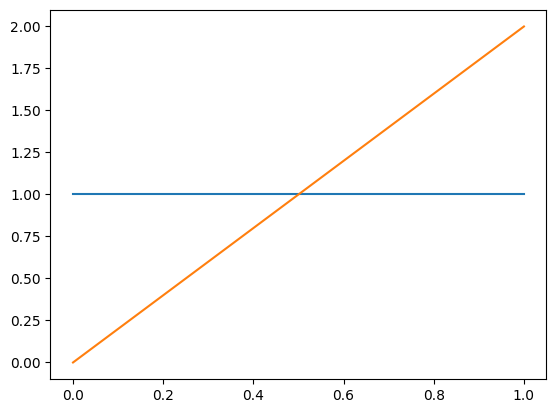

In [10]:
N = 1000 # Number of points
pi = jnp.linspace(0,1,N)

posterior = likelihood(1, pi)*prior(pi) 
posterior = posterior / posterior.sum()*(N-1)

plt.plot(pi, prior(pi), label="Prior")
plt.plot(pi, posterior, label="Posterior")
plt.show()



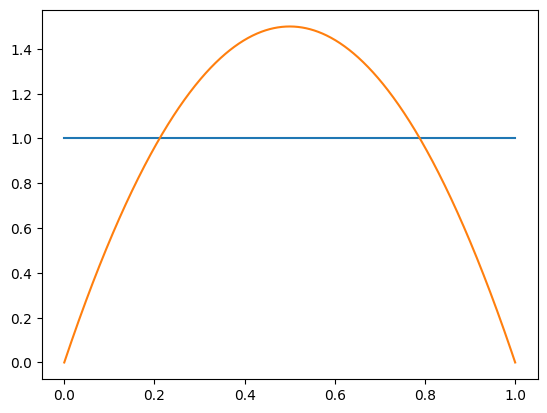

In [11]:
posterior = likelihood(0, pi)*posterior 
posterior = posterior / posterior.sum()*(N-1)

plt.plot(pi, prior(pi), label="Prior")
plt.plot(pi, posterior, label="Posterior")
plt.show()